In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg,grid2svg
from pydae import ssa
import pydae.plot_tools as pplt
import scipy.optimize as sopt
from pydae.urisi.lines import change_line
colors = pplt.set_style(plt)

In [4]:
from pydae.urisi.utils import report_v
from pydae.urisi.utils import get_v

In [5]:
import dcdc2

In [34]:
model = dcdc2.model()

S_n = 100e3
V_n = 800
I_n = S_n/V_n
Conduction_losses = 0.02*S_n # = A*I_n**2
A = Conduction_losses/(I_n**2)
B = 1
C = 0.02*S_n

params = {'p_load_D2':200e3}
params.update({'A_D1':A,'B_D1':B,'C_D1':C,'Droop_i_D1':0.5,'T_f_D1':0.1})
params.update({'A_D3':A,'B_D3':B,'C_D3':C,'Droop_i_D3':0.5,'T_f_D3':0.1})
params.update({'e_h_ref_D1':865})
params.update({'e_h_ref_D3':865})
model.ini(params,'xy_0.json')


True

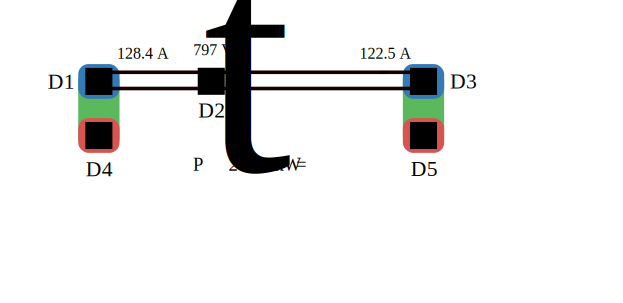

In [35]:
s = svg('dcdc2.svg')
s.set_grid(model,'dcdc2.hjson')
p_total = model.get_value('p_h_D4') + model.get_value('p_h_D5')
s.set_text('PLOSS',f"{p_total/1000:5.1f} kW")
s.set_text('l_D1_D2',f"{ model.get_value('i_l_D1_0_D2_0_r'):4.1f} A")
s.set_text('l_D3_D2',f"{-model.get_value('i_l_D2_0_D3_0_r'):4.1f} A")
s.set_text('V_D2',f"{model.get_value('V_D2_0_r')-model.get_value('V_D2_1_r'):4.0f} V")
s.set_tooltips('dcdc2_tooltips.svg')    
SVG('dcdc2_tooltips.svg')

In [36]:
ssa.A_eval(model)
ssa.damp_report(model)

,Real,Imag,Freq.,Damp
Mode 1,-9.208052,0.0,0.0,1.0
Mode 2,-131.579891,0.0,0.0,1.0
Mode 3,-0.010000,0.0,0.0,1.0


In [37]:
params.update({'p_load_D2':100e3})
model.ini(params,'xy_0.json')
model.run(1.0,{})
model.run(2.0,{'p_load_D2':150e3})
model.post();

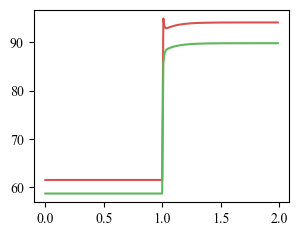

In [39]:
fig,axes = plt.subplots()
axes.plot(model.Time, model.get_values('i_l_D1_0_D2_0_r'))
axes.plot(model.Time,-model.get_values('i_l_D2_0_D3_0_r'))

In [110]:
model.report_u()

p_load_D2 =100000.00
e_h_ref_D1 =800.00
e_h_ref_D3 =800.00
v_ref_D4 =400.00
v_ref_D5 =400.00
u_freq = 0.00
